In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
data = np.loadtxt('/home/santiago/santiago_FCII_20251/final_FCII_25_1/data/solution.txt')

xs = data[:,0]
Ts = data[:,1]
Ys = data[:,2]
Yeqs = data[:,3]
geff = data[:,4]
heff = data[:,5]
dlngeffdlnTs = data[:,6]
dlnheffdlnTs = data[:,7]
rhos = data[:,8]
ss = data[:,9]
Hs = data[:,10]

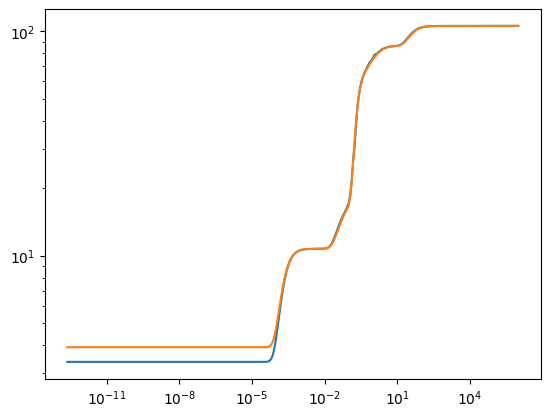

In [15]:
plt.loglog(Ts,geff)
plt.loglog(Ts,heff)

(2e-12, 0.01)

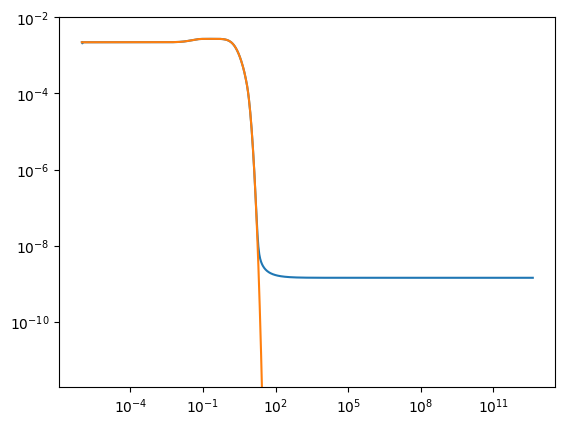

In [20]:
plt.loglog(xs,Ys)
plt.loglog(xs,Yeqs)
plt.ylim(2e-12,1e-2)